<a href="https://www.kaggle.com/code/caiomelo22/21-22-champions-league-analysis?scriptVersionId=120106282" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import os

In the next cell, we are going to initialize a dataframe with general information from all players. We selected the key_stats.csv because it contains the information of all players, no matter the position.

In [2]:
files_base_dir = '/kaggle/input/ucl-202122-uefa-champions-league'
all_players_file = 'key_stats'

players_df = pd.read_csv(f"{files_base_dir}/{all_players_file}.csv").set_index(['player_name', 'club', 'position']).stack().unstack()

In [3]:
players_df.head()

,,,minutes_played,match_played,goals,assists,distance_covered
player_name,club,position,,,,,
Aaronson,Salzburg,Midfielder,715,8,0,2,103.5
Abubakari,Malmö,Forward,116,4,0,0,15.3
Acuña,Sevilla,Defender,379,5,0,0,43.2
Adams,Leipzig,Midfielder,292,5,0,0,38.9
Adamu,Salzburg,Forward,231,8,1,0,32.6


In [4]:
players_df.columns

Index(['minutes_played', 'match_played', 'goals', 'assists',
       'distance_covered'],
      dtype='object')

Now, we are going to unite all of the information in the csv files into one single dataframe. For that, we are going to concatenate each of the csvs based on a ['player_name', 'club', 'position'] index.

In [5]:
files = ['attacking', 'defending', 'goalkeeping', 'attempts', 'disciplinary', 'distributon', 'goals']

for file in files:
    players_extracted = pd.read_csv(f"{files_base_dir}/{file}.csv")
    players_extracted = players_extracted.set_index(['player_name', 'club', 'position']).stack().unstack()
    
    players_extracted.drop('serial', axis=1, inplace=True, errors='ignore')
    for col in list(players_df.columns):
        players_extracted.drop(col, axis=1, inplace=True, errors='ignore')
    
    players_df = pd.concat([
        players_df,
        players_extracted
    ], axis=1)
    
players_df.reset_index(inplace=True)
players_df.fillna(0.0, inplace=True)

In [6]:
players_df.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,corner_taken,offsides,...,cross_attempted,cross_complted,freekicks_taken,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties
0,Aaronson,Salzburg,Midfielder,715.0,8.0,0.0,2.0,103.5,4.0,5.0,...,18.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abubakari,Malmö,Forward,116.0,4.0,0.0,0.0,15.3,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Acuña,Sevilla,Defender,379.0,5.0,0.0,0.0,43.2,0.0,0.0,...,30.0,12.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Adams,Leipzig,Midfielder,292.0,5.0,0.0,0.0,38.9,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Adamu,Salzburg,Forward,231.0,8.0,1.0,0.0,32.6,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
players_df.columns

Index(['player_name', 'club', 'position', 'minutes_played', 'match_played',
       'goals', 'assists', 'distance_covered', 'corner_taken', 'offsides',
       'dribbles', 'balls_recoverd', 'tackles', 't_won', 't_lost',
       'clearance_attempted', 'saved', 'conceded', 'saved_penalties',
       'cleansheets', 'punches made', 'total_attempts', 'on_target',
       'off_target', 'blocked', 'fouls_committed', 'fouls_suffered', 'red',
       'yellow', 'pass_accuracy', 'pass_attempted', 'pass_completed',
       'cross_accuracy', 'cross_attempted', 'cross_complted',
       'freekicks_taken', 'right_foot', 'left_foot', 'headers', 'others',
       'inside_area', 'outside_areas', 'penalties'],
      dtype='object')

In [8]:
players_df.describe()

,minutes_played,match_played,goals,assists,corner_taken,offsides,dribbles,balls_recoverd,tackles,t_won,...,cross_attempted,cross_complted,freekicks_taken,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,...,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,329.845539,5.062583,0.490013,0.374168,0.782956,0.332889,2.105193,13.697736,3.950732,1.727031,...,5.145140,1.380826,4.430093,0.237017,0.169108,0.079893,0.005326,0.442077,0.050599,0.047936
std,248.883454,2.739357,1.310305,0.843689,3.341780,1.240848,6.611776,14.799026,4.905667,2.503076,...,8.819159,2.844664,6.567808,0.806483,0.636159,0.333079,0.072835,1.227045,0.268520,0.283489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,490.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.500000,6.000000,2.000000,...,7.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1230.000000,13.000000,15.000000,7.000000,36.000000,10.000000,83.000000,76.000000,35.000000,18.000000,...,81.000000,24.000000,53.000000,11.000000,8.000000,3.000000,1.000000,13.000000,3.000000,3.000000


Now, we are going to scatterplot the goals/shots by position

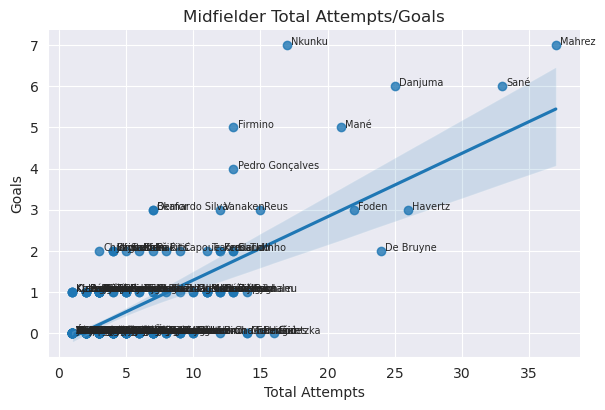

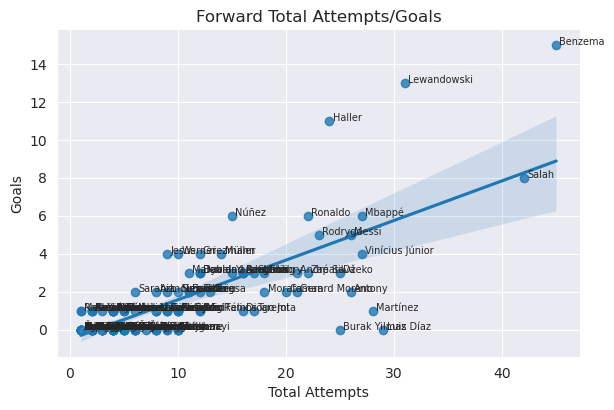

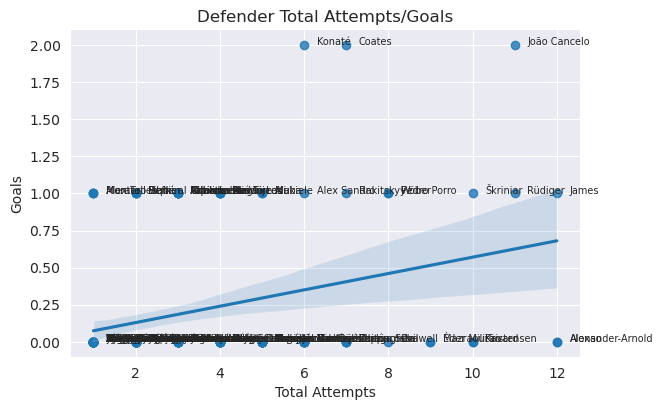

In [9]:
def plot_scatter(data, x, y, xlabel, ylabel, title='', hue=None, height=4, text_spacing=0.3):
    fgrid = sns.lmplot(data=data, x=x, y=y, hue=hue, height=height, aspect=1.5)
    ax = fgrid.axes[0,0]
    
    plt.title(f"{title} {xlabel}/{ylabel}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    for i, row in data.iterrows():
        ax.text(row[x] + text_spacing, row[y], row['player_name'], fontsize=7)
    

positions = players_df['position'].unique()
for position in positions:
    goals_shots_data = players_df[(players_df['position'] == position) & (players_df['total_attempts'] > 0)]
    if not len(goals_shots_data): continue
    plot_scatter(goals_shots_data, 'total_attempts', 'goals', xlabel='Total Attempts', ylabel='Goals', title=position)


Or we can just plot all of it in a sigle chart

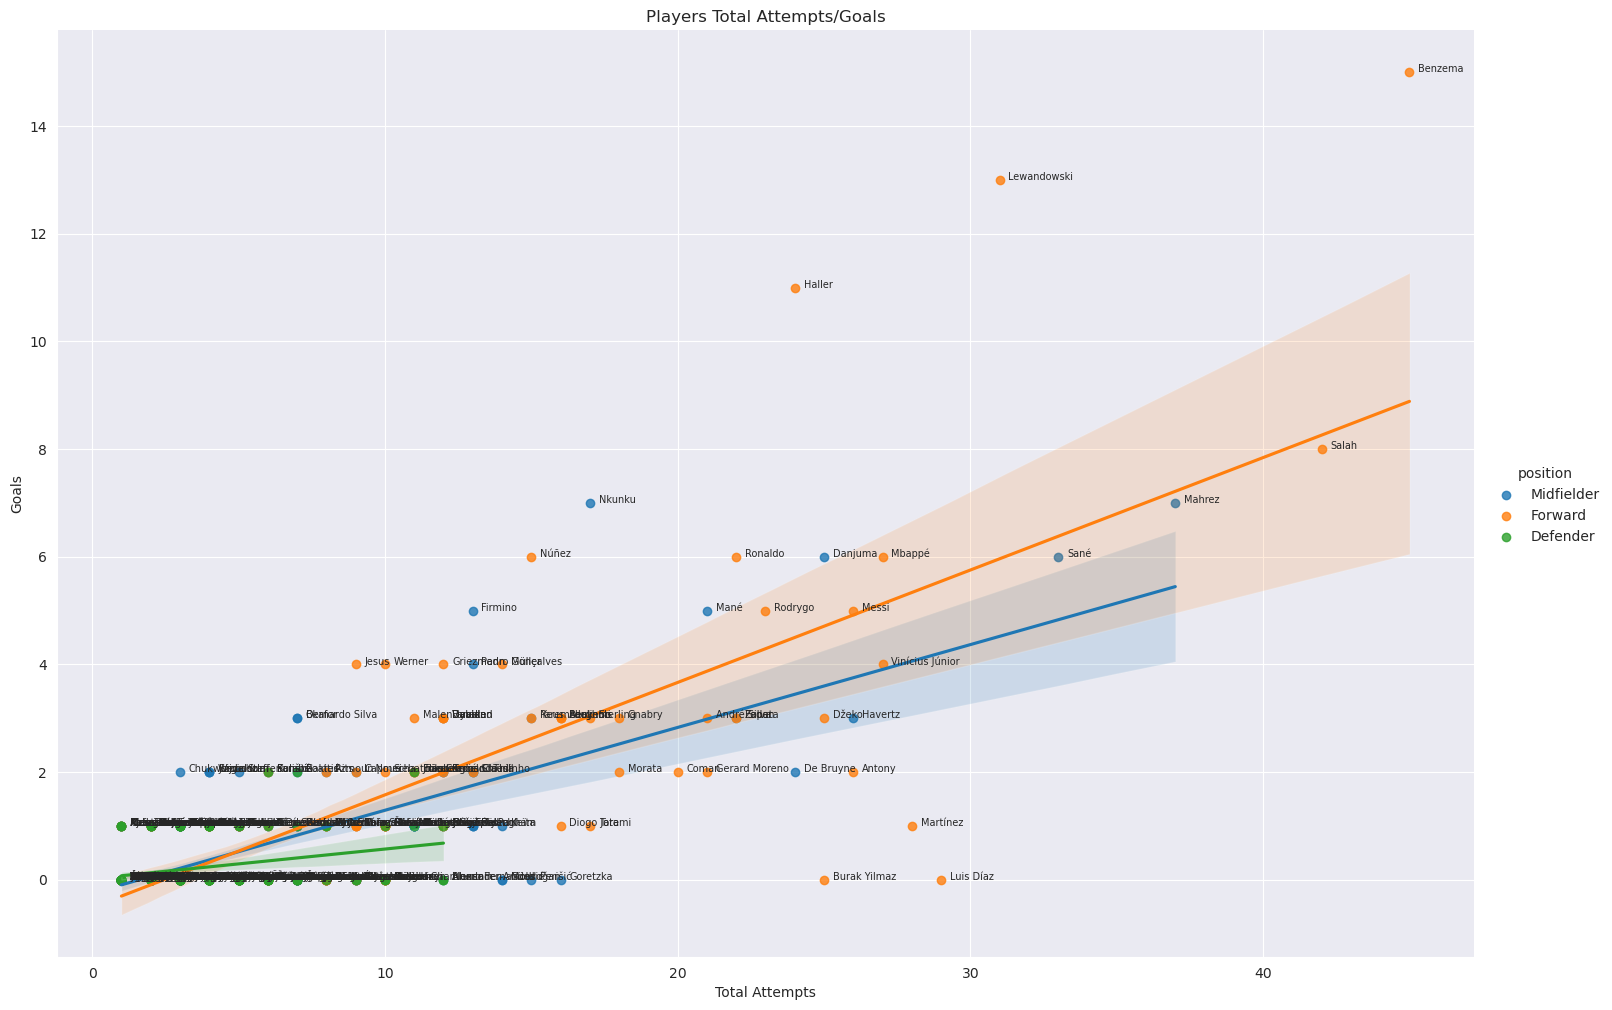

In [10]:
goals_shots_data = players_df[players_df['total_attempts'] > 0]
plot_scatter(goals_shots_data, 'total_attempts', 'goals', xlabel='Total Attempts', ylabel='Goals', title='Players', hue='position', height=10)

By looking at these charts, we can see that, of course, the players upfront tend to get goals with fewer attempts than those that play on a more defensive role. A few players that are worth highlighting are Benzema, Lewandowski and Haller, whose goals tally were way above the projected line for fowards. Another one worth mentioning is Nkunku that, despite not having that many shots, managed to get 7 goals. He was way above the projected line for any position.

A couple of famous lowlights were Martinez and Luis Diaz. If you saw the 2022 World Cup, Martinez' being under the projected line was not a surprise, even though this numbers were in the Champions League that preceded the World Cup.

Let's take a look at the fowards goals when we compare them with their offsides.

In [11]:
forwards_df = players_df[(players_df['goals'] > 0) & (players_df['position'] == 'Forward')]
forwards_df.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,corner_taken,offsides,...,cross_attempted,cross_complted,freekicks_taken,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties
4,Adamu,Salzburg,Forward,231.0,8.0,1.0,0.0,32.6,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Adeyemi,Salzburg,Forward,607.0,8.0,3.0,1.0,69.2,0.0,0.0,...,7.0,2.0,1.0,0.0,3.0,0.0,0.0,3.0,0.0,2.0
17,Alcácer,Villarreal,Forward,73.0,3.0,1.0,0.0,10,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
22,Alexis Sánchez,Inter,Forward,155.0,6.0,1.0,1.0,19,0.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
28,André Silva,Leipzig,Forward,410.0,6.0,3.0,2.0,47.2,0.0,9.0,...,3.0,2.0,1.0,2.0,0.0,1.0,0.0,3.0,0.0,0.0


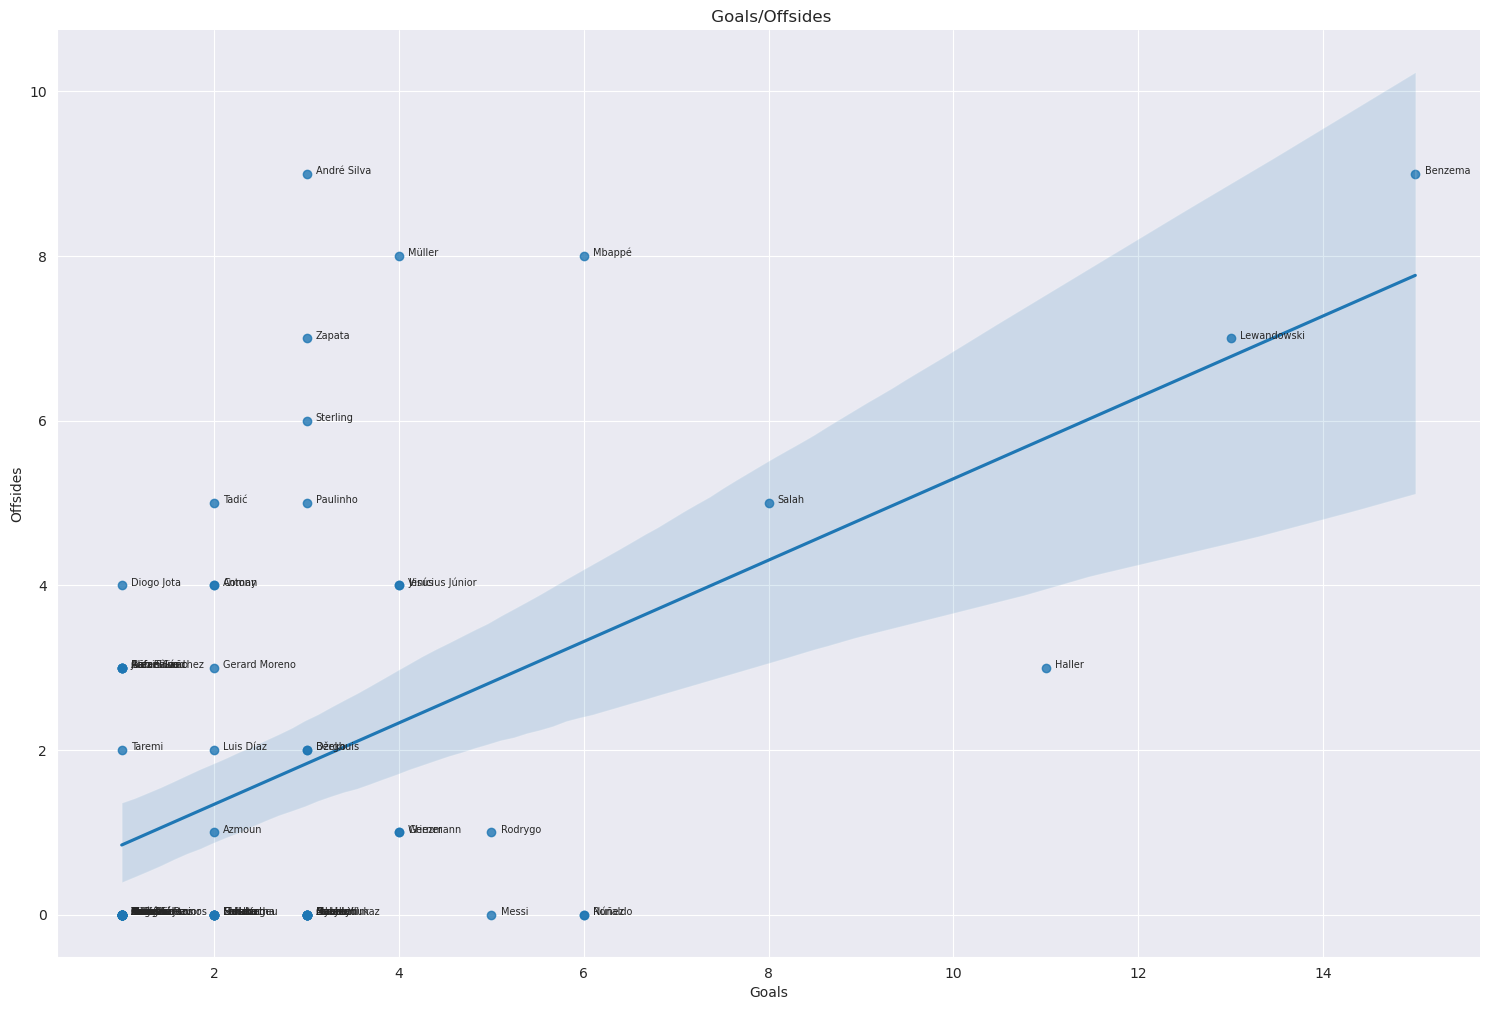

In [12]:
plot_scatter(forwards_df, 'goals', 'offsides', xlabel='Goals', ylabel='Offsides', height=10, text_spacing=0.1)

When we look at this chart, a couple of things stood out for me.

1. Mbappé, which is one of the best players in the world, is way above the projected line. That means that he gets offside way more than he should, based on his goals contribution.
2. Haller, the third best scorer in the competition, has only 3 offsides. That shows that he converts his opportunities and shows awareness of his position, something that an elite striker must have.

We know that football is not only about the goals, but also about how you can assist your teammates to score as well. Let's take a look at this two stats.

In [13]:
players_df['goal_contributions'] = players_df['goals'] + players_df['assists']
players_df.loc[:, ['player_name', 'goals', 'assists', 'goal_contributions']].sort_values('goal_contributions', ascending=False).head()

,player_name,goals,assists,goal_contributions
57,Benzema,15.0,1.0,16.0
374,Lewandowski,13.0,3.0,16.0
602,Sané,6.0,6.0,12.0
271,Haller,11.0,1.0,12.0
701,Vinícius Júnior,4.0,6.0,10.0


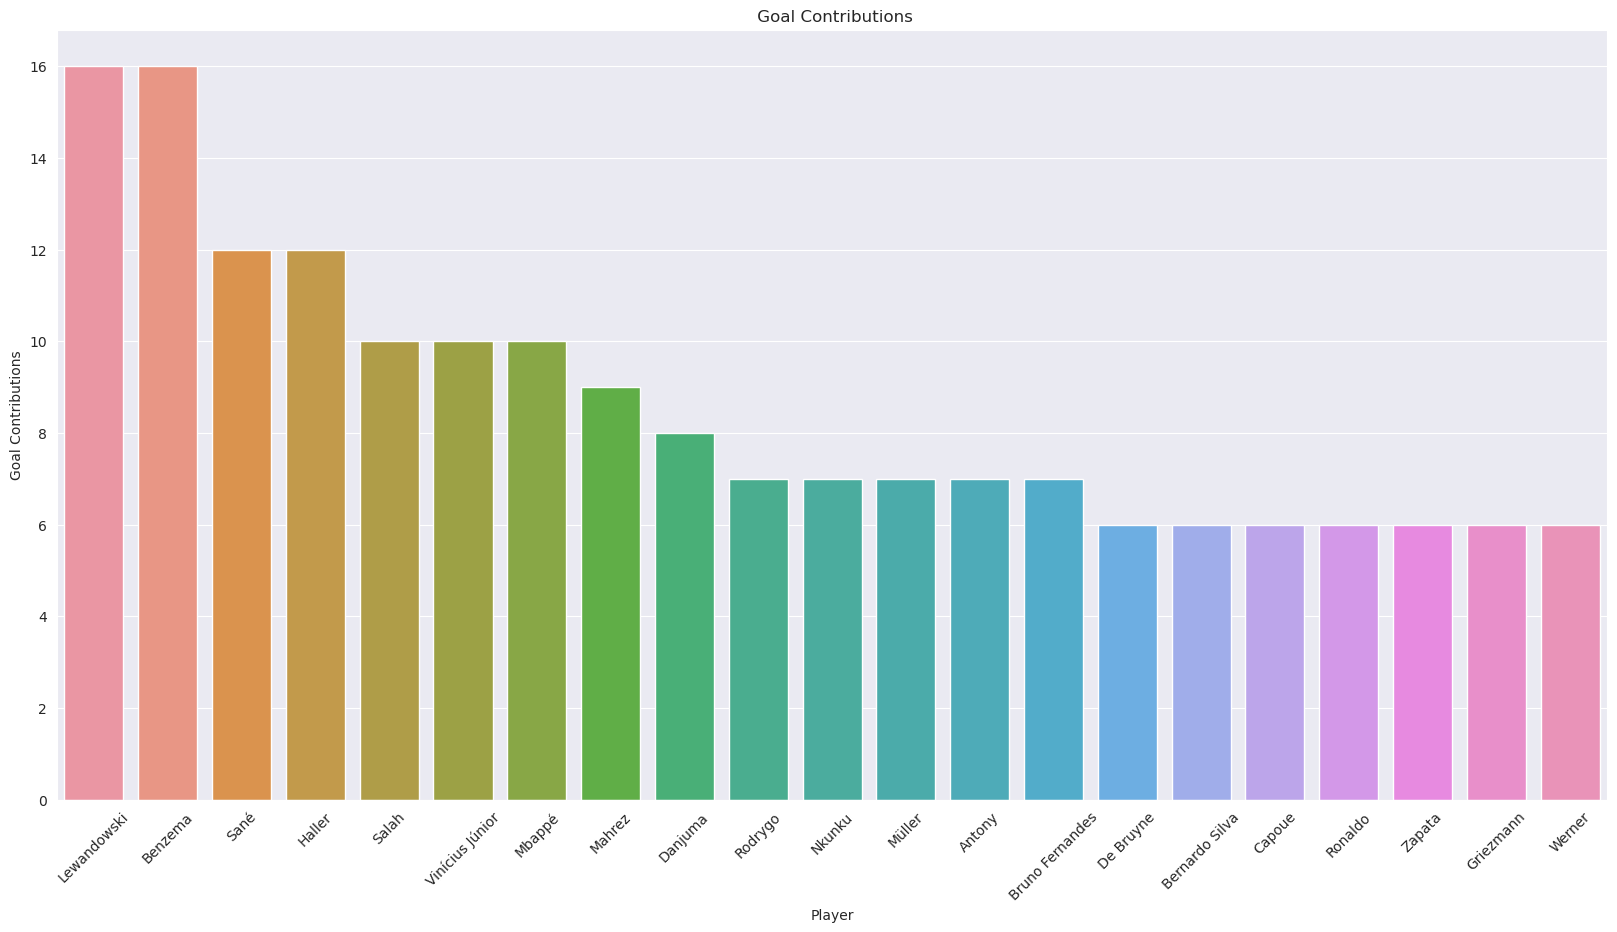

In [14]:
def plot_bar(data, y, ylabel, title=''):
    plt.figure(figsize=(20,10))
    bar_plot = sns.barplot(data=data, x='player_name', y=y)
    
    plt.title(f"{title} {ylabel}")
    plt.xlabel('Player')
    plt.ylabel(ylabel)
    
    for item in bar_plot.get_xticklabels():
        item.set_rotation(45)
    
plus_goal_contributions = players_df[players_df['goal_contributions'] > 0].sort_values('goal_contributions', ascending=False).reset_index()
plot_bar(plus_goal_contributions.loc[:20, :], 'goal_contributions', ylabel='Goal Contributions')

Okay. When we compared the goals scored by each player, we used metrics like attempts and offsides to check how much they've tryed to score. Now that we are looking at goals + assists, I think it's fair to use minutes played to see their efficiencies, since teams reached further stages and there are players that played more than others.

In [15]:
players_df['goal_contributions_by_min'] = players_df['goal_contributions'] / players_df['minutes_played']
players_df.loc[:, ['player_name', 'club', 'minutes_played', 'goals', 'assists', 'goal_contributions', 'goal_contributions_by_min']].sort_values('goal_contributions_by_min', ascending=False).head()

,player_name,club,minutes_played,goals,assists,goal_contributions,goal_contributions_by_min
511,Ozdoev,Zenit,11.0,1.0,0.0,1.0,0.090909
634,Stanišić,Bayern,21.0,0.0,1.0,1.0,0.047619
62,Bernardo,Salzburg,23.0,0.0,1.0,1.0,0.043478
494,Novoa,Leipzig,24.0,0.0,1.0,1.0,0.041667
13,Al. Miranchuk,Atalanta,33.0,0.0,1.0,1.0,0.030303


Well, I don't think there are a lot of big names there. Don't get me wrong, I'm sure Ozdoev is a decent player, but let's set a threshold of 180 minutes played to see who were able to constantly be the best.

In [16]:
min_played_threshold = 180
minimum_min_played = players_df[players_df['minutes_played'] > min_played_threshold]
minimum_min_played.loc[:, ['player_name', 'club', 'minutes_played', 'goal_contributions_by_min', 'goal_contributions']].sort_values('goal_contributions_by_min', ascending=False).head()

,player_name,club,minutes_played,goal_contributions_by_min,goal_contributions
720,Werner,Chelsea,246.0,0.024390,6.0
374,Lewandowski,Bayern,876.0,0.018265,16.0
528,Pedro Gonçalves,Sporting CP,329.0,0.018237,6.0
271,Haller,Ajax,668.0,0.017964,12.0
183,Dybala,Juventus,255.0,0.015686,4.0


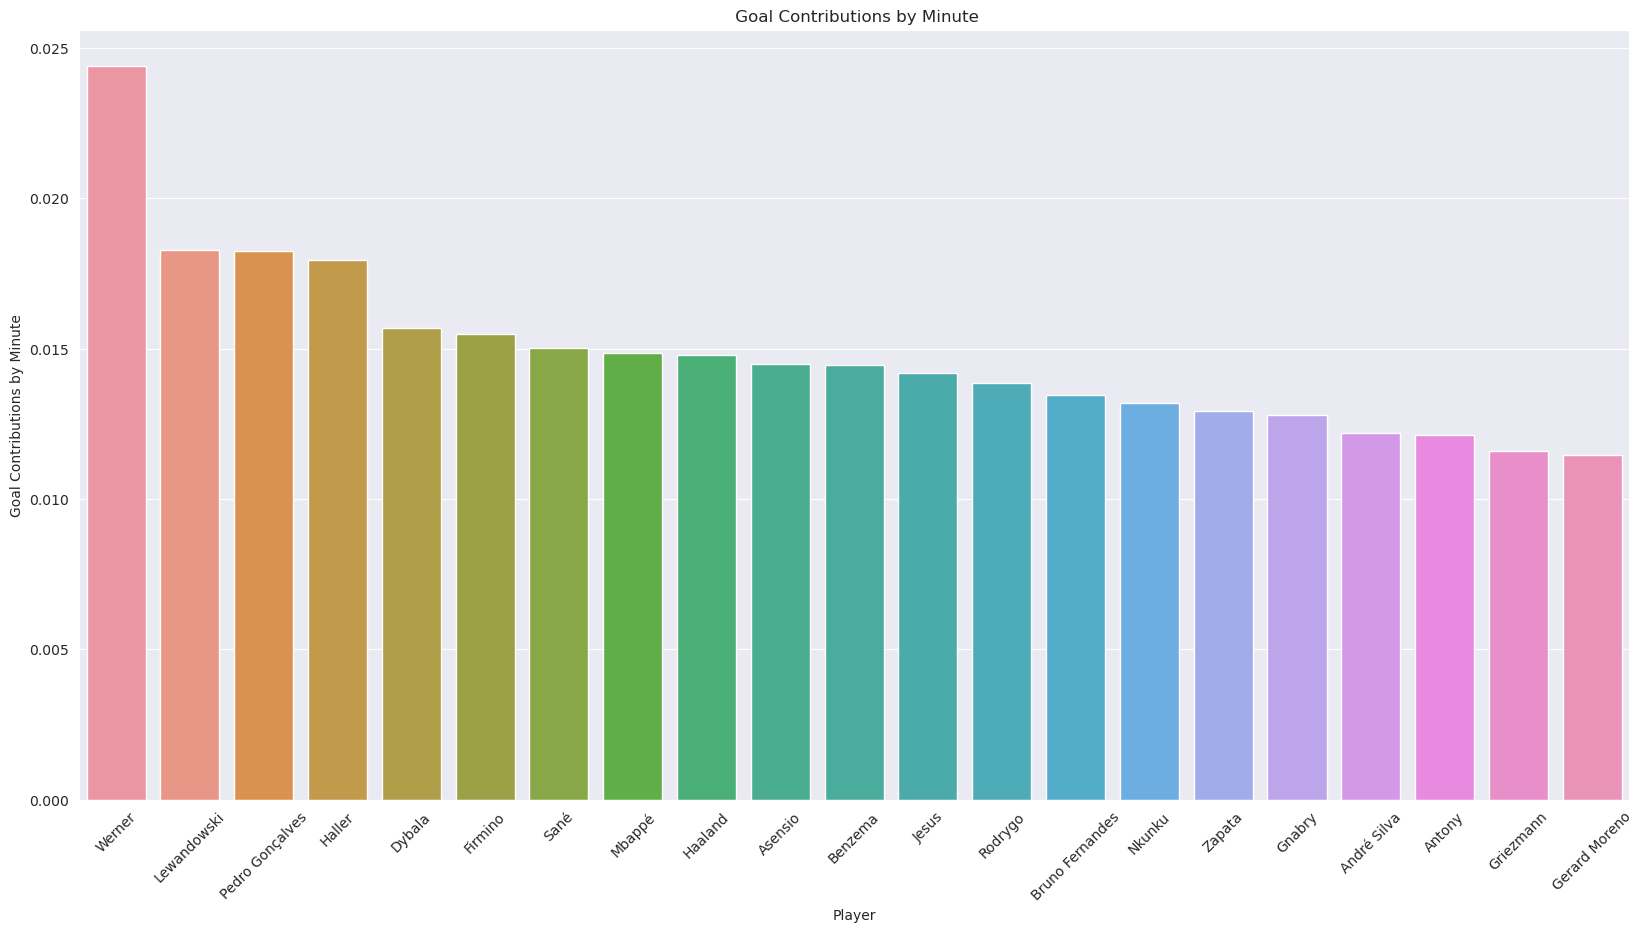

In [17]:
plus_goal_contributions = minimum_min_played.sort_values('goal_contributions_by_min', ascending=False).reset_index()
plot_bar(plus_goal_contributions.loc[:20, :], 'goal_contributions_by_min', ylabel='Goal Contributions by Minute')

Okay! Now we are getting somewhere. I gotta tell you that I'm surprised to see Werner up there with some margin to the second place. Well, I think Chelsea really made a mistake by getting him transfered after this performance in the Champions League.

Other thing that I noticed is that Pedro Gonçalves is in the top 3. If I were a big club looking for a hidden gem in the smaller leagues such as the Liga NOS, I would consider looking more closely into Gonçalves' matches.